# Credit Card Fraud Detection

'Credit Card Fraud Prediction', involves developing a model to predict fraudulent credit card transactions based on a set of input features. The goal of this project is to help financial institutions detect and prevent fraudulent transactions, which can save them significant amounts of money and protect their customers.

# Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

# Loading the Dataset

In [4]:
df = pd.read_csv('E:\ML_Projects_New\Credit Card Fault Detection\creditcard.csv')

In [5]:
#first five rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#last five rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
#distribution of legit transaction and fraudlent transaction
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- Data is imbalanced

- 0 represents Normal Transaction 
- 1 represents Fraud Transaction 

In [11]:
#seperating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [12]:
print(legit.shape, fraud.shape)

(284315, 31) (492, 31)


In [13]:
#getting the statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
#compare the values for the both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

- The Mean amount of Fraud Tansaction is far higher than a Normal Transaction.

Build a sample dataset containing similar distribution of normal transaction and Fraudulent Transaction

Numer of Fraudulent Transaction - 492

In [16]:
legit_sample = legit.sample(n=492)

- Concatinating two dataframe

In [17]:
new_df = pd.concat([legit_sample, fraud], axis=0)

In [21]:
new_df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
249787,154577.0,2.071340,-0.433039,-3.469033,-1.408402,2.740152,2.699301,0.048986,0.508551,-0.049094,...,0.068000,0.094394,0.078919,0.805618,0.100681,1.366135,-0.159386,-0.092308,39.99,0
212516,138894.0,-1.298443,1.948100,-4.509947,1.305805,-0.019486,-0.509238,-2.643398,1.283545,-2.515356,...,1.178032,1.360989,-0.272013,-0.325948,0.290703,0.841295,0.643094,0.201156,0.01,1
6717,8408.0,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,-3.796354,...,0.615642,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,1.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1
151399,95489.0,1.676506,0.000317,0.153649,3.884831,-0.141961,0.925102,-0.702367,0.385891,0.920454,...,-0.277551,-0.909089,0.444850,0.486437,-0.732939,-0.469735,-0.053363,-0.026324,83.23,0
79835,58199.0,0.340391,2.015233,-2.777330,3.812024,-0.461729,-1.152022,-2.001959,0.548681,-2.344042,...,0.299769,-0.583283,-0.187696,-0.329256,0.732328,0.058080,0.553143,0.318832,1.75,1
85047,60575.0,-0.772488,-3.285256,0.067392,2.034120,-1.961561,0.343420,0.505365,0.076930,0.777940,...,0.713543,-0.237482,-0.818512,0.053533,-0.183006,-0.413866,-0.123357,0.203268,991.00,0
262826,160665.0,-0.417340,4.700055,-7.521767,7.671884,0.260821,-2.646693,-2.854432,0.958783,-4.588536,...,0.622200,-0.437708,-0.090358,-0.742802,-0.312361,0.502575,0.821390,0.372379,0.77,1
191074,129095.0,-1.836940,-1.646764,-3.381168,0.473354,0.074243,-0.446751,3.791907,-1.351045,0.095186,...,0.010663,1.786681,-0.151178,-0.582098,-0.956062,-0.334369,0.715600,0.370450,720.80,1
116906,74474.0,-0.482158,0.928183,1.444300,-0.207997,0.191323,-0.400719,0.603384,0.090392,-0.666410,...,-0.186100,-0.527389,-0.048439,-0.010909,-0.167102,0.073058,0.257848,0.109622,10.99,0


In [22]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

# Splitting the data into Features and Target

In [23]:
X = new_df.drop(columns='Class', axis=1)
y = new_df['Class']

In [24]:
print(X)

            Time         V1        V2         V3        V4         V5  \
222787  143116.0  -0.095191  0.587384  -0.078396 -0.999450   1.276282   
13942    24735.0 -14.575410  9.802337 -18.043109  6.136942 -11.623105   
264071  161252.0  -1.685656  1.196787   0.138919  1.158643  -1.301215   
235816  148546.0  -1.694467 -0.117284  -0.559610 -2.284084   2.330339   
275633  166643.0  -1.786614  2.010275  -1.298433 -0.493811  -0.029655   
...          ...        ...       ...        ...       ...        ...   
279863  169142.0  -1.927883  1.125653  -4.518331  1.749293  -1.566487   
280143  169347.0   1.378559  1.289381  -5.004247  1.411850   0.442581   
280149  169351.0  -0.676143  1.126366  -2.213700  0.468308  -1.120541   
281144  169966.0  -3.113832  0.585864  -5.399730  1.817092  -0.840618   
281674  170348.0   1.991976  0.158476  -2.583441  0.408670   1.151147   

              V6         V7        V8        V9  ...       V20       V21  \
222787  1.009718   0.655401  0.431251 -0.185389

In [25]:
print(y)

222787    0
13942     0
264071    0
235816    0
275633    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Split the Data into Training and testing data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Model Building

In [30]:
log_reg = LogisticRegression()

In [31]:
log_reg.fit(X_train, y_train)

LogisticRegression()

# Model Evaluation

In [39]:
#Accuracy on training data
y_pred_train = log_reg.predict(X_train)
acc_train = accuracy_score(y_pred_train, y_train)
print(acc_train)

0.9186785260482846


In [41]:
#Accuracy on test data
y_pred_test = log_reg.predict(X_test)
acc_test = accuracy_score(y_pred_test, y_test)
print(acc_test)

0.9137055837563451


C:\Users\Nehak\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


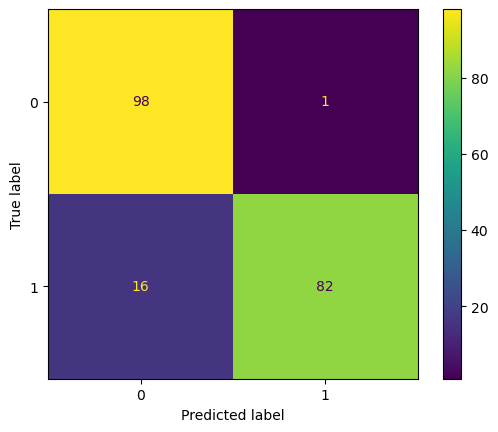

In [42]:
plot_confusion_matrix(log_reg, X_test, y_test)

In [43]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92        99
           1       0.99      0.84      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



# Evaluating AUC and ROC

C:\Users\Nehak\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


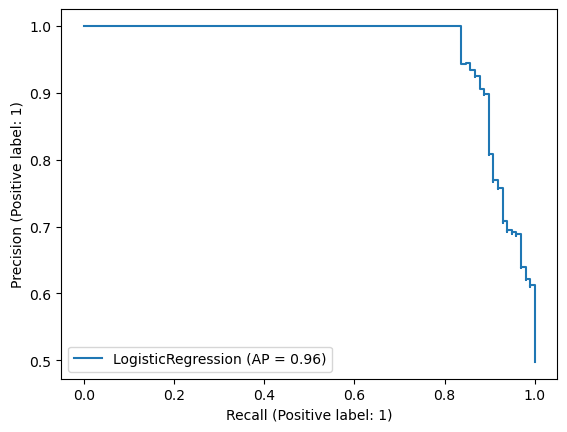

In [45]:
#AUC Curve
plot_precision_recall_curve(log_reg, X_test, y_test)

C:\Users\Nehak\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


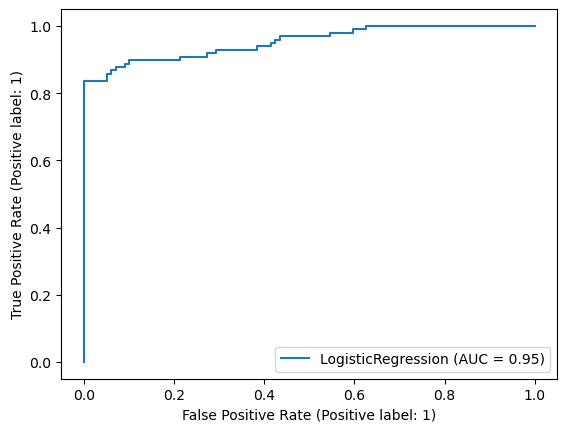

In [48]:
#ROC curve
plot_roc_curve(log_reg, X_test, y_test)